# Rage against the matching

Our company is getting more and more popular!

Every night we get more drunk people who want to get home.

![TheBigBangTheory](../assets/tbbt.gif "tbbt")

With great popularity comes the great responsibility of transporting customers efficiently. One way we accomplish this is minimizing the average waiting time.

Here's how it is done today:
- A customer requests a ride.
- The nearest taxi gets assigned to it

This leads to situation like this:

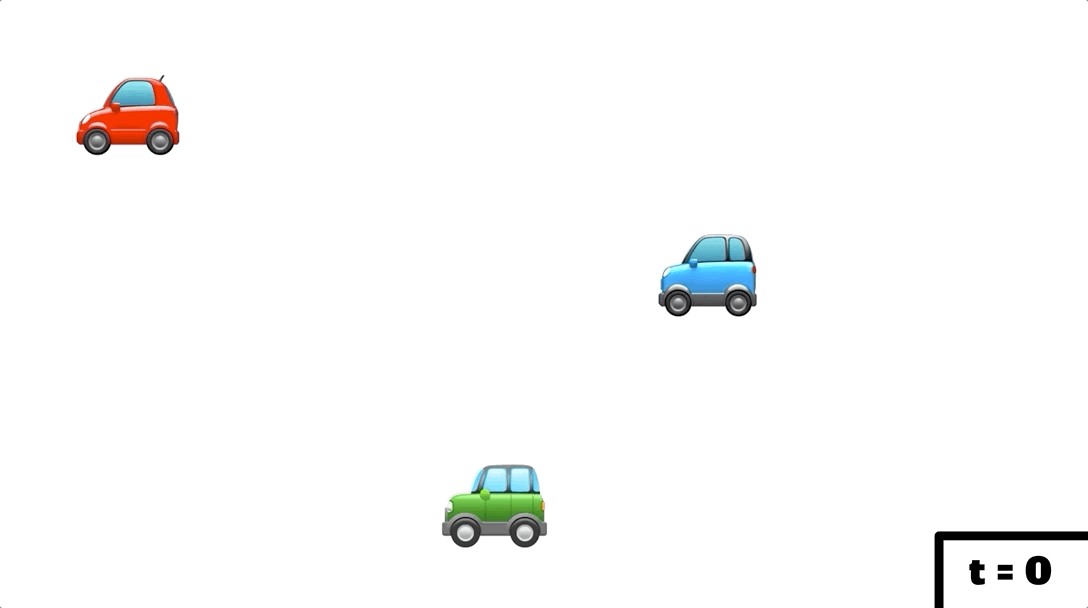

## Context

We'd like to minimize the overall waiting time of all customers. Therefore, we decide to group customers together by request time in oder to dispatch them with the bigger picture in mind.

For every customer group, we query a taxi to customer time matrix from our routing engine:

|       |   A   |   B   |   C   |
| ----- | :---: | :---: | :---: |
| **0** |  1.5  |  2.5  |  5.0  |
| **1** |  5.0  |  5.5  |  1.5  |
| **2** |  2.0  |  7.5  |  5.5  |

This means the customer **0** would wait 5 minutes for the taxi **C**.

In [1]:
import numpy as np

distances = np.array([
    [1.5, 2.5, 5.],
    [5., 5.5, 1.5],
    [2., 7.5, 5.5]
])
distances

array([[1.5, 2.5, 5. ],
       [5. , 5.5, 1.5],
       [2. , 7.5, 5.5]])

## Task

Your mission, should you choose to accept it, is to complete the function that returns tuples of _(customer_id, taxi_id)_ alongside the average waiting time.

In the last cell, your function will be called with the `distances` matrix.
You can then visualise the results of your function, by running it.

Please fill the `get_matching` function. For convenience, you can represent both customers and taxis with integers. Just replace taxi **A**, **B** and **C** by **0**, **1** and **2**.

As this is an assignment problem we recommend using the [Hungarian algorithm](https://en.wikipedia.org/wiki/Hungarian_algorithm) implemented in `scipy.optimize`

In [2]:
from typing import Tuple, List
import scipy.optimize

Matchings = List[Tuple[int, int]] # Tuples (customer_id, taxi_id)
Response = Tuple[float, Matchings]

def get_matching(distances: np.array) -> Response :
    cus_ind, tax_ind = scipy.optimize.linear_sum_assignment(distances)
    matchings = list(zip(cus_ind, tax_ind))
    time = distances[cus_ind, tax_ind].sum()
    return time, matchings

In [3]:
import module

module.check_p3(get_matching(distances))

'Correct!'

<IPython.core.display.Javascript object>


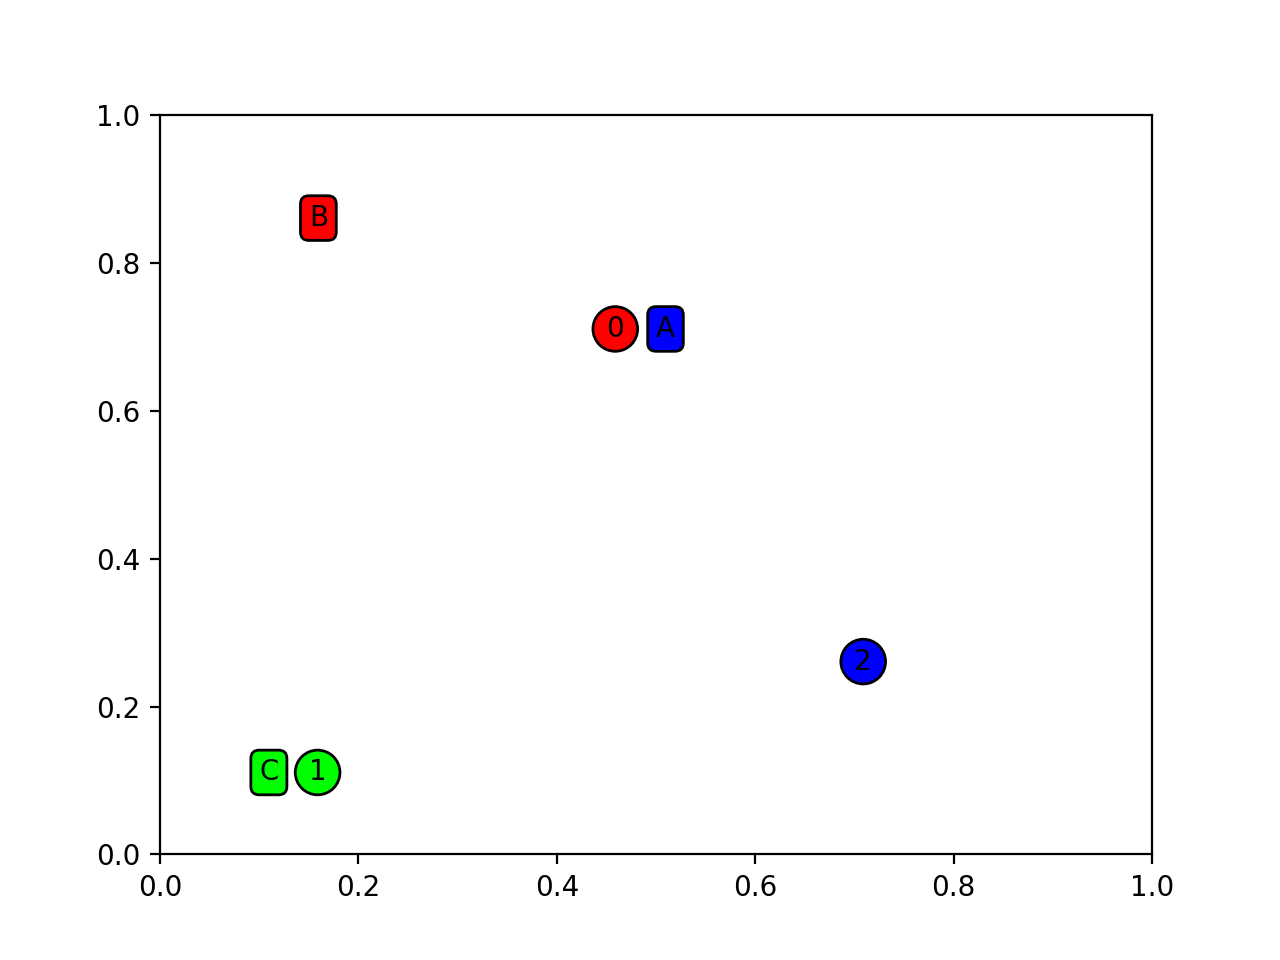

Average waiting time is 6.0 minutes.


In [4]:
%matplotlib notebook
from matplotlib import pyplot as plt

def plot_results(avg_time, matchings):
    c_c = [(1., 0., 0.), (0., 1., 0.), (0., 0., 1.)]
    c_t = {m[1]: c_c[m[0]] for m in matchings}

    plt.text(0.5, 0.7, "A", size=10, bbox=dict(boxstyle="round", fc=c_t[0]))
    plt.text(0.15, 0.85, "B", size=10, bbox=dict(boxstyle="round", fc=c_t[1]))
    plt.text(0.1, 0.1, "C", size=10, bbox=dict(boxstyle="round", fc=c_t[2]))
    plt.text(0.45, 0.7, "0", size=10, bbox=dict(boxstyle="circle", fc=c_c[0]))
    plt.text(0.15, 0.1, "1", size=10, bbox=dict(boxstyle="circle", fc=c_c[1]))
    plt.text(0.7, 0.25, "2", size=10, bbox=dict(boxstyle="circle", fc=c_c[2]))

    plt.show()
    print(f'Average waiting time is {avg_time} minutes.')

avg_time, matchings = get_matching(distances)
plot_results(avg_time, matchings)